In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data
data = pd.read_csv("C:/Users/Elliot/Downloads/ONLINE COURSES/ELEVOO INTERNSHIP/Data/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


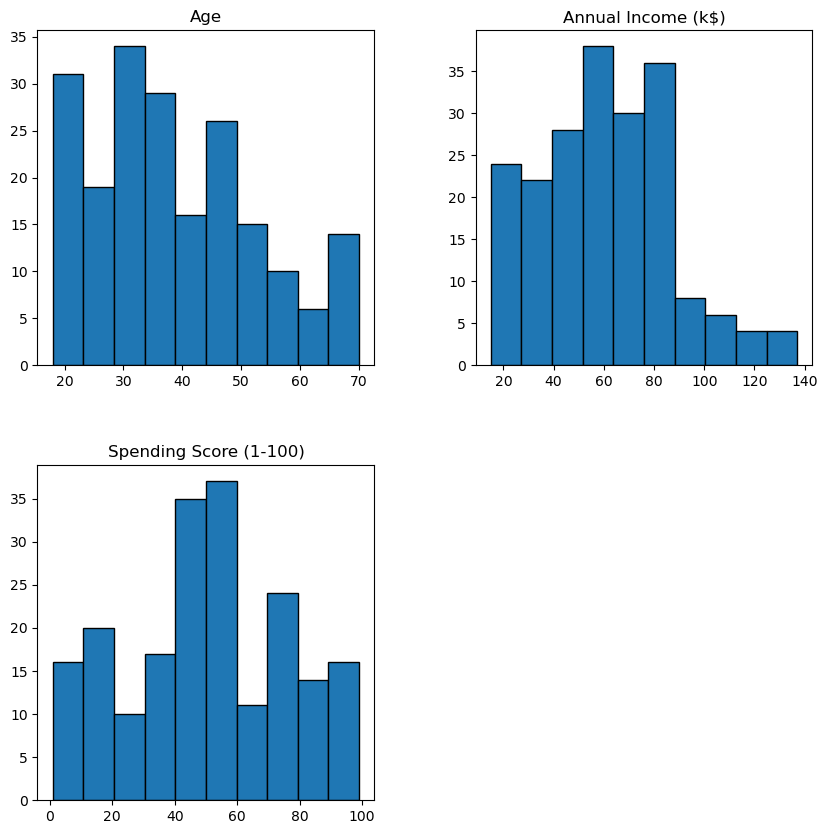

In [6]:
a = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
a.hist(grid = False, figsize = (10,10), edgecolor = "black")
plt.show()

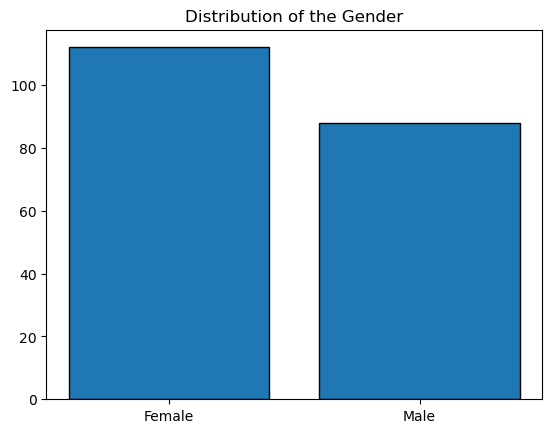

In [7]:
b = data['Gender'].value_counts()
plt.bar(b.index, b.values, edgecolor = "black")
plt.title("Distribution of the Gender")
plt.show()

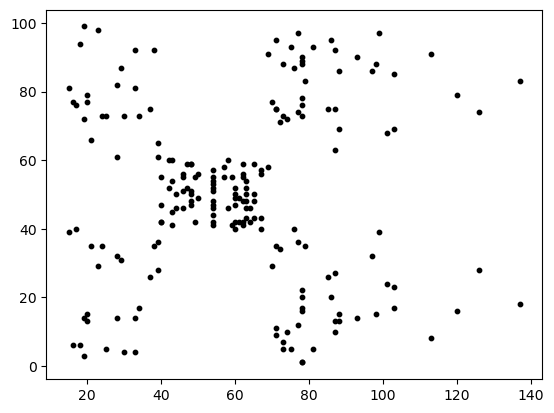

In [8]:
# Plotting the values to understand the spread
Income = data['Annual Income (k$)'].values
Spend = data['Spending Score (1-100)'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=10)
plt.show()

In [9]:
# Selecting the features to be used for cluster analysis and scaling them
a1=data.iloc[:,[3,4]].values

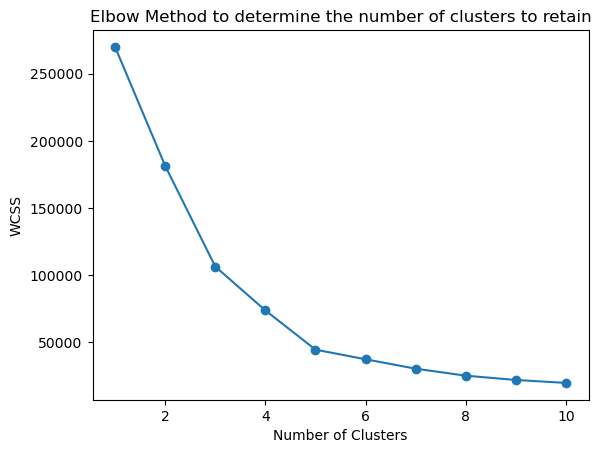

In [10]:
#Determining the number of clusters to use using the elbow method
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(a1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method to determine the number of clusters to retain")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

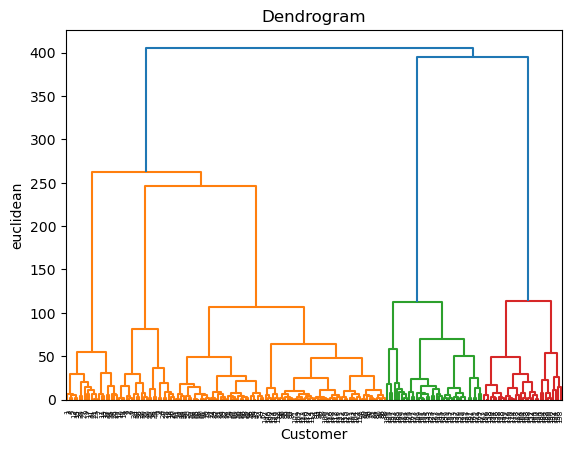

In [11]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(a1, method='ward'))

plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

In [12]:
# The number of clusters to be used is 5
k = KMeans(n_clusters= 5, random_state=42, n_init=10)
clusters = k.fit_predict(a1)

In [13]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(a1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3774913479961559
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.5532176107575425
For n_clusters=6, The Silhouette Coefficient is 0.4554616746264097
For n_clusters=7, The Silhouette Coefficient is 0.5315303699289704
For n_clusters=8, The Silhouette Coefficient is 0.45556242418344917
For n_clusters=9, The Silhouette Coefficient is 0.45424761985314005
For n_clusters=10, The Silhouette Coefficient is 0.3964139320792443


In [14]:
##Fitting kmeans to the data
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(a1)

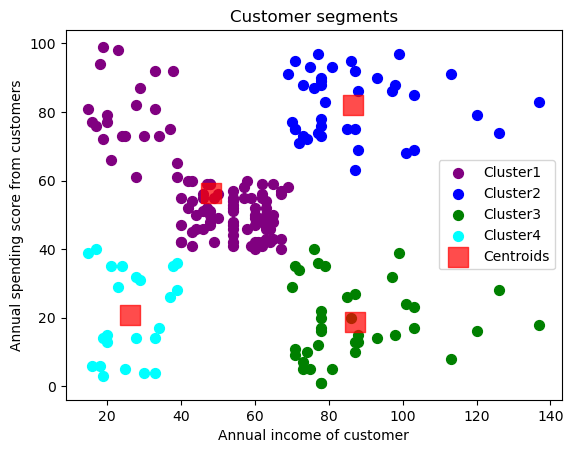

In [15]:
#Visualising the clusters for k=4
plt.scatter(a1[y_means==0,0],a1[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(a1[y_means==1,0],a1[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(a1[y_means==2,0],a1[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(a1[y_means==3,0],a1[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spending score from customers')
plt.legend()
plt.show()